## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 5*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


Obtener el gradiente morfológico ∇(I) = (I ⊕ B) − (I ⊖ B) de la imagen brain-scan.jpeg. Explicar cuál es el resultado obtenido y explicar por qué se le llama gradiente.

--------

#### *Importar librerías*

Como primer paso, se importan las librerías necesarias para el desarrollo del ejercicio.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from scipy import ndimage
import os

#### *Gradiente Morfológico*

Luego, se define la función gradiente_morfologico que recibe como parámetro la imagen y el elemento estructurante. Esta función aplica la dilatación y la erosión a la imagen y luego resta ambas imágenes para obtener el gradiente morfológico.

In [2]:
def gradienteMorfologico(imagen, kernel):

    # Aplicar la dilatación y la erosión
    dilatacion = cv2.dilate(imagen, kernel, iterations=1)
    erosion = cv2.erode(imagen, kernel, iterations=1)

    # Calcular el gradiente morfológico
    gradiente = dilatacion - erosion
    
    return gradiente

#### *Escaneo Cerebral*

A continuación, se lee la imagen brain-scan.jpeg y se muestra la imagen original. Asimismo, se aplica un gradiente morfológico a la imagen y se muestra el resultado obtenido.

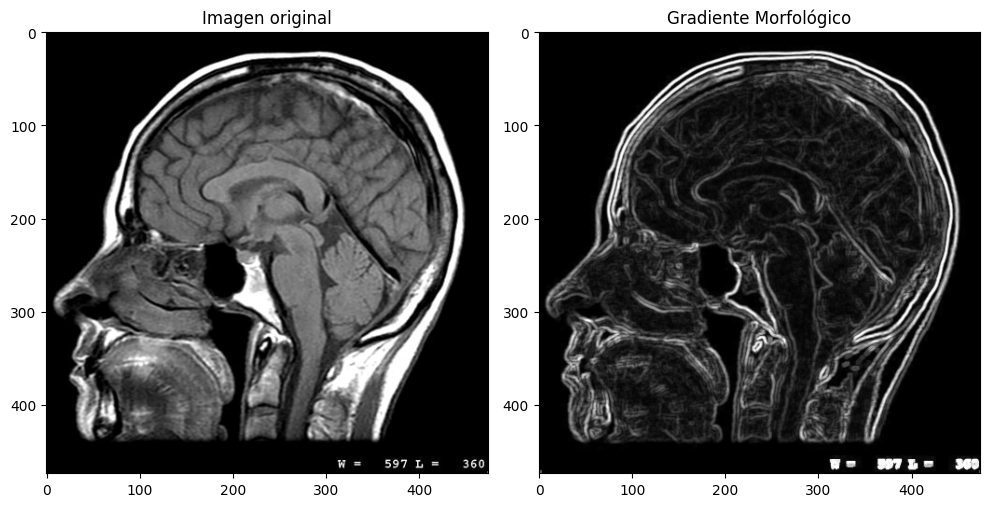

In [11]:
# Cargar la imagen
imagen = cv2.imread('img/brain-scan.jpeg', 0)

# Crear un kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))

# Aplicar el gradiente morfológico
gradiente = gradienteMorfologico(imagen, kernel)

# Mostrar la imagen original y el gradiente morfológico
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(imagen, cmap='gray')
ax[0].set_title('Imagen original')

ax[1].imshow(gradiente, cmap='gray')
ax[1].set_title('Gradiente Morfológico')

fig.tight_layout()
plt.show()


Como se puede observar, a través de esta operación se obtiene una imagen que resalta los bordes de la imagen original. Esto permite que se pueda ver las diferentes estructuras encefálicas de la imagen original.

#### *Ejemplos adicionales*

Finalmente, se realizaron otros ejemplos con diferentes imágenes para comprender mejor el funcionamiento del gradiente morfológico.

In [16]:
# Función para mostrar el gradiente morfológico

def graph_morphological_gradient(imagen):

    # Crear un kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))

    # Aplicar el gradiente morfológico
    gradiente = gradienteMorfologico(imagen, kernel)

    # Mostrar la imagen original y el gradiente morfológico
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes.ravel()

    ax[0].imshow(imagen, cmap='gray')
    ax[0].set_title('Imagen original')

    ax[1].imshow(gradiente, cmap='gray')
    ax[1].set_title('Gradiente Morfológico')

    fig.tight_layout()
    plt.show()

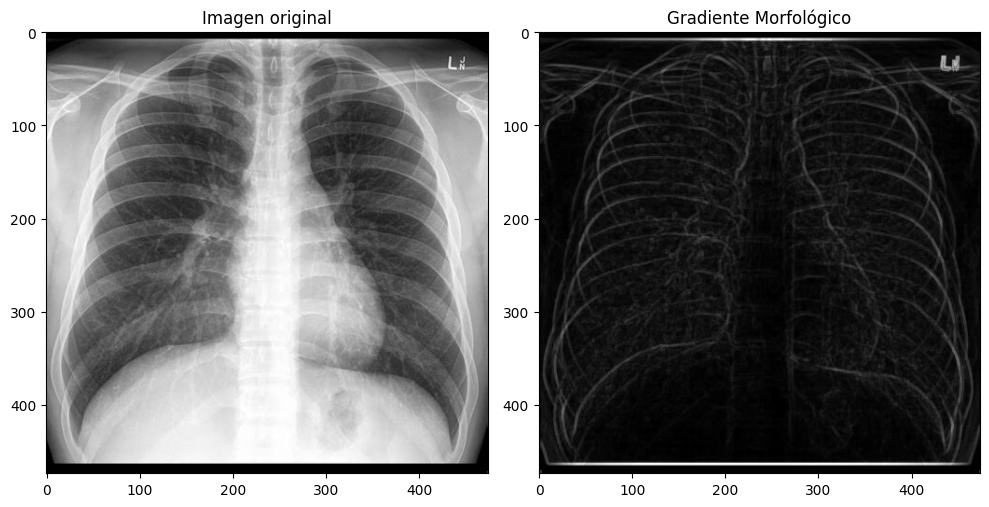

In [17]:
# chestxray.jpeg
imagen = cv2.imread('img/chestxray.jpeg', 0)
graph_morphological_gradient(imagen)

En el caso de los X-Rays de los pulmones, se puede observar que el gradiente morfológico resalta los bordes de las costillas y los huesos cercanos a los pulmones, incluyendo la columna vertebral. Asimismo, también permite distinguir el contorno del corazón.

Cabe destacar que también se puede visualziar cierta textura, que posiblemente representa las estructuras cardiovasculares de los pulmones.

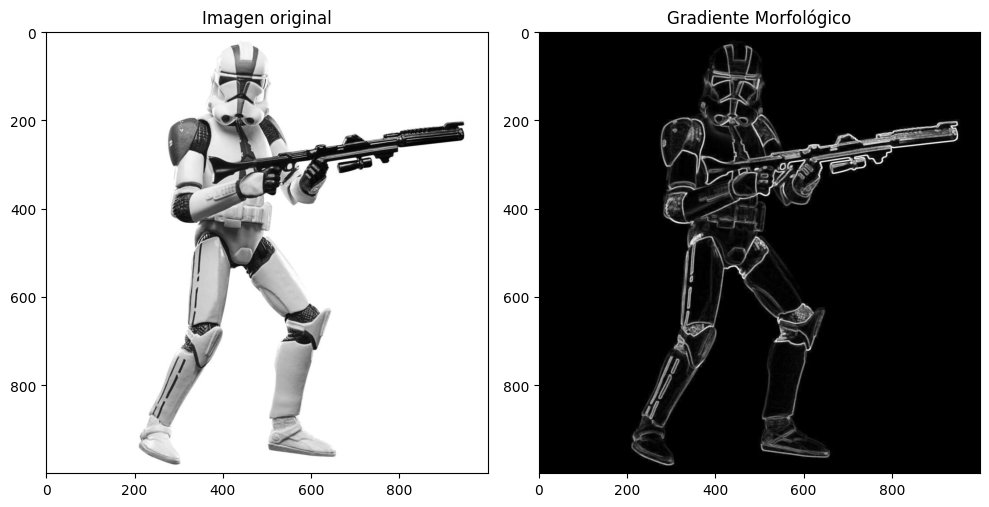

In [18]:
# clone-tropper.jpg
imagen = cv2.imread('img/clone-tropper.jpg', 0)
graph_morphological_gradient(imagen)

En esta image, debido a que es relativamente simple, se puede observar que el gradiente morfológico resalta los bordes de la imagen original.

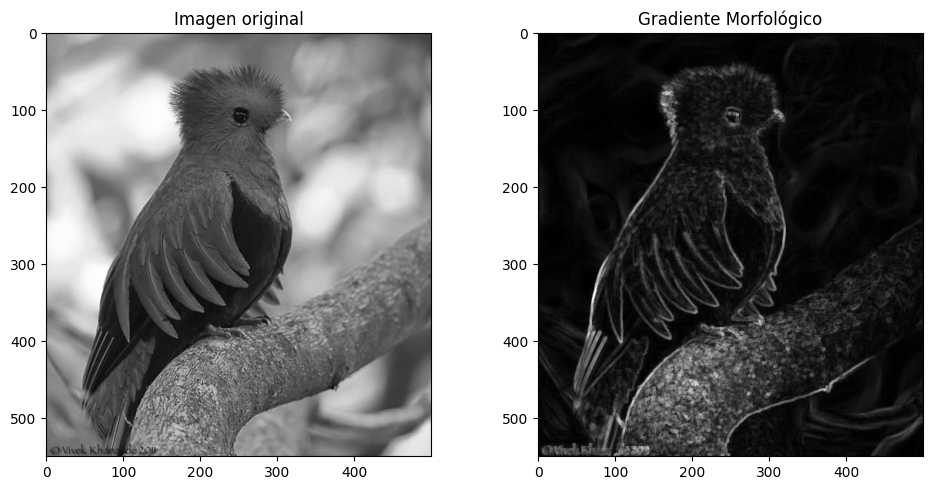

In [21]:
# quetzalgris.png
imagen = cv2.imread('img/quetzalgris.png', 0)
graph_morphological_gradient(imagen)

En el caso del quetzal, se puede observar que el gradiente morfológico resalta los bordes del ave, incluyendo las plumas y el pico. Asimismo, también permite distinguir el contorno de la rama. 

*Cabe destacar que se está resaltando principalmente en dónde hay cambios drásticos de color.*

----------

#### *Análisis*

El gradiente morfológico, como se mencionó anteriormente, es una operación que permite resaltar bordes de una imagen. Esto se logra a través de la dilatación y la erosión de la imagen original. La dilatación expande los objetos y la erosión los contrae, por lo que al restarlas se obtiene una imagen que resalta los bordes de la imagen original.

Este funcionamiento teórico se pudo observar en los ejemplos realizados, ya que en todos los casos se obtuvo una imagen que resaltaba los bordes de la imagen original. Por ejemplo:

- En el caso de los X-Rays del cerebro, se pudo observar que el gradiente morfológico resaltaba los bordes de las diferentes estructuras encefálicas, incluyendo los pliegues cerebrales. 
- En los X-Rays de los pulmones, se pudo observar que el gradiente morfológico resaltaba los bordes de las costillas y los huesos cercanos a los pulmones, incluyendo la columna vertebral. Asimismo, también permite distinguir el contorno del corazón.
- En el caso del quetzal, se pudo observar que el gradiente morfológico logró identificar los contornos de las plumas y el pico del ave, así como el contorno de la rama. Cabe destacar que la textura de las plumas también se resaltó. Esto se debe a que las plumas presentan cambios de color, lo que causó que el gradiente morfológico resaltara dichos cambios.
- En el caso de la imagen simple, se pudo observar que el gradiente morfológico resaltaba los bordes de la imagen original.

En matemática, "gradiente" se refiere a la diferencia o cambio en una función. 

Con esto en mente, al gradiente morfológico se le llama así porque representa la **diferencia** entre la dilatación y la erosión de una imagen. Asimismo, los bordes identificados en la imagen resultante señalizan en dónde hay **cambios** de intensidad/color en la imagen original. 